# Introduction

This data looks at purchase history for 45 customers and what type of items that they bought. The data has three columns Milk, Grocery and Frozen foods and the amount that was spent. From this is it then possible to cluster the customers based on what they buy. This may be useful is for example companies what to recommend new products to customers.

In [ ]:
library("ggplot2")
library("dplyr")
library("dendextend")

In [2]:
customers_spend <- readRDS('/home/james/Downloads/ws_customers.rds')

In [3]:
count(customers_spend)
head(customers_spend)

n
45


Milk,Grocery,Frozen
11103,12469,902
2013,6550,909
1897,5234,417
1304,3643,3045
3199,6986,1455
4560,9965,934


First, the distance between customers needs to be calculated we will use Euclidean distance. Next, we will cluster the customers based on their purchase history using the complete method and then generate a dendrogram plot to show the relationship.

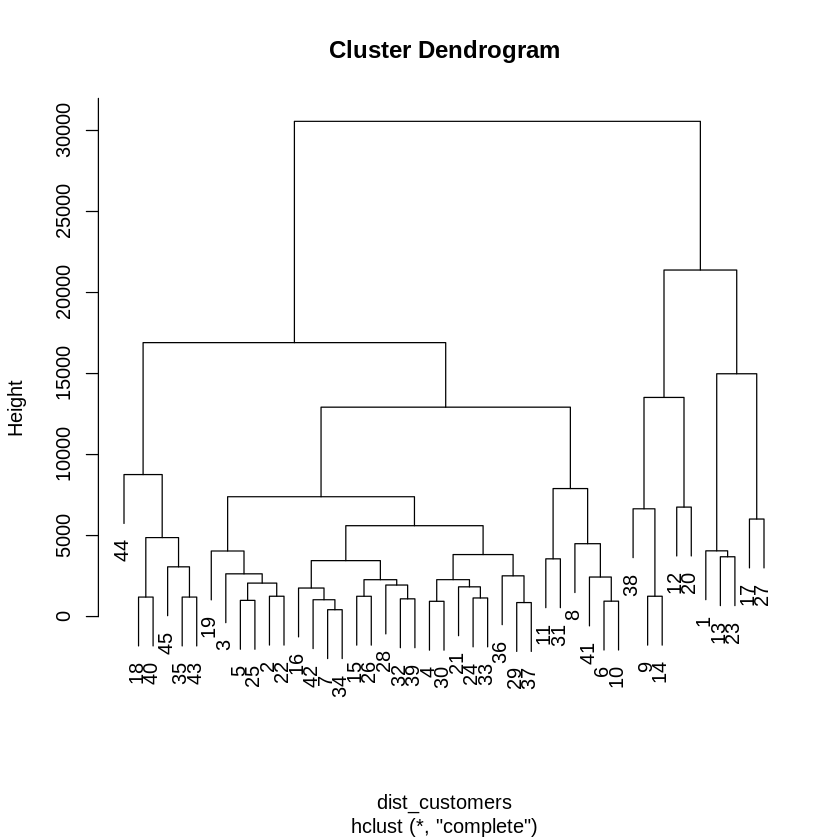

In [4]:
dist_customers <- dist(customers_spend)
hc_customers <- hclust(dist_customers, method = "complete")
plot(hc_customers)

This plot is not effective as it only shows one cluster. Therefore, we need to increase the number of clusters that the hieratical cluster generates. Therefore by limiting the hight to 10,000 will give more cluster in the dataset.

In [5]:
dist_customers <- dist(customers_spend)
hc_customers <- hclust(dist_customers)
clust_customers <- cutree(hc_customers, h = 10000)
segment_customers <- mutate(customers_spend, cluster = clust_customers)

By limiting the hight to 10,000 this produces 7 clusters as shown in the count below also how many customers that fall into each cluster.

In [6]:
count(segment_customers, cluster)

cluster,n
1,3
2,23
3,6
4,3
5,2
6,2
7,6


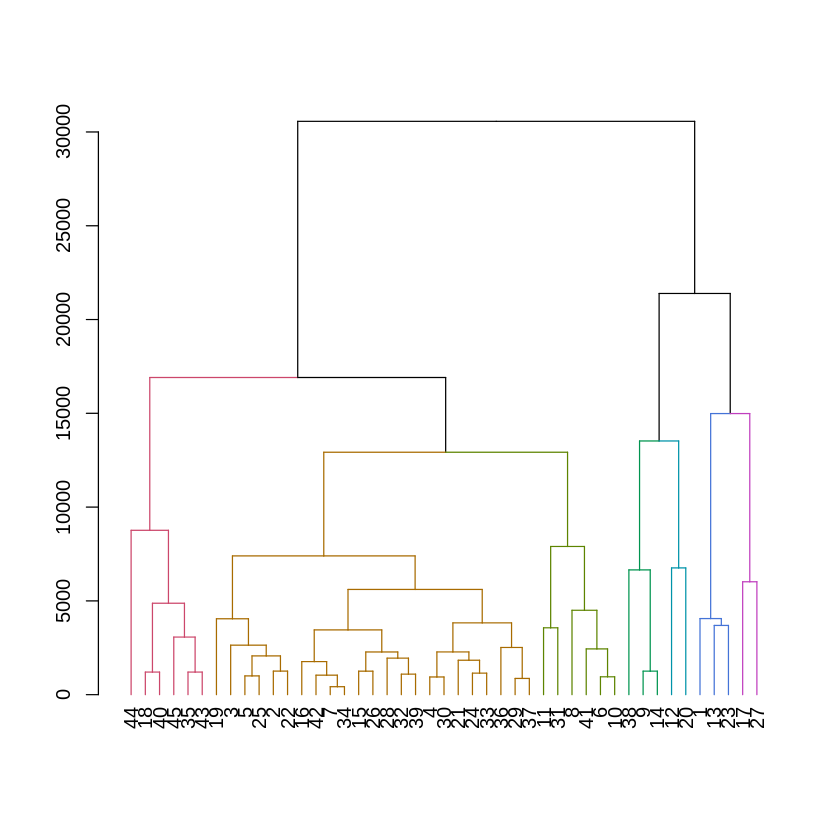

In [7]:
dend_customers <- as.dendrogram(hc_customers)
dend_colored <- color_branches(dend_customers, h = 10000)
plot(dend_colored)

In [8]:
segment_customers %>% 
  group_by(cluster) %>% 
  summarise_all(funs(mean(.)))

cluster,Milk,Grocery,Frozen
1,13008.000,11081.667,787.6667
2,1970.348,3883.348,2051.1304
3,4592.333,10387.000,815.6667
4,13688.000,22936.000,1627.6667
5,5598.500,21972.500,945.5000
6,22863.000,15606.000,1296.5000
7,1249.500,3916.833,10888.6667


The data shows that cluster two is the largest suggesting that most customers fit into this group. Whereas, the other clusters have significantly fewer customers in them. Suggesting that they either spent significantly more money than average or less. This shows that cluster two spending habits are average compared to the other groups that spent more money. However, this group could be divided up based on other products that are not included in this data.